# Технологии машинного обучения
# Рубежный контроль №2
# Тема: технологии использования и оценки моделей машинного обучения

## ИУ5-63 Богданов Дмитрий Александрович
## 4 вариант

Задача 2. Кластеризация данных.

Кластеризуйте данные с помощью двух алгоритмов кластеризации (варианты по группам приведены в таблице).
Сравните качество кластеризации с помощью следующих метрик качества кластеризации (если это возможно для Вашего набора данных):
Adjusted Rand index
Adjusted Mutual Information
Homogeneity, completeness, V-measure
Коэффициент силуэта

Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных.

### Импорт библиотек

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, Birch
from itertools import cycle, islice
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import silhouette_score

### Загрузка данных

In [21]:
data = pd.read_csv('toy_dataset.csv', sep =',')

### Описание датасета

Number: A simple index number for each row

City: The location of a person (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin)

Gender: Gender of a person (Male or Female)

Age: The age of a person (Ranging from 25 to 65 years)

Income: Annual income of a person (Ranging from -674 to 177175)

Illness: Is the person Ill? (Yes or No)

In [22]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [23]:
data.shape

(1250, 6)

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [26]:
le=LabelEncoder()
data['Illness'] = le.fit_transform(data['Illness'])
data['Gender'] = le.fit_transform(data['Gender'])
data['City'] = le.fit_transform(data['City'])

### Подбор оптимального количества кластеров

In [27]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
    inertia.append(np.sqrt(kmeans.inertia_))

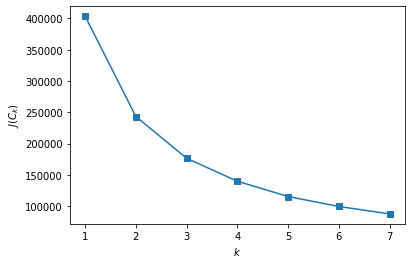

In [28]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

В качетве метрики будем использовать коэффициент силуэта, с помощью него и подберем оптимальное число кластеров.

In [29]:
inertia = []
for k in range(3, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit_predict(data) 
    inertia.append((silhouette_score(data, kmeans),k))
inertia

[(0.5335227743369465, 3),
 (0.5248533049350932, 4),
 (0.5195149732527982, 5),
 (0.510784589732852, 6),
 (0.5092214692389273, 7),
 (0.5158977578523498, 8),
 (0.5050231318618665, 9),
 (0.5014456285240916, 10),
 (0.4936935199050081, 11),
 (0.5008305794708459, 12),
 (0.49729703612561277, 13),
 (0.4937801640769588, 14),
 (0.4866722580503778, 15),
 (0.48367738445178576, 16),
 (0.48914429545322563, 17),
 (0.48019563787822944, 18),
 (0.485583378896327, 19)]

Выберем число кластеров = 3

### Кластеризация алгоритмами Kmeans и Birch

In [42]:
KMeans_3 = KMeans(n_clusters=3,init='k-means++', random_state=1)
KMeans_3_result = KMeans_3.fit_predict(data)

In [32]:
Birch_3 = Birch(n_clusters=3)
Birch_3_result = Birch_3.fit_predict(data)

### Сравнение моделей

In [43]:
silhouette_score(data,KMeans_3_result)

0.5335227743369465

In [44]:
silhouette_score(data,Birch_3_result)

0.521927436148556

Метрика показывает, что алгоритмы одинаково хорошо справились с кластеризацией, однако значение метрики чуть больше у метода k-средних..